<a href="https://colab.research.google.com/github/nsalazard/Introduction_To_Cryptography/blob/main/DES/DES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pycryptodome pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 26.6 MB/s eta 0:00:00


Texto en Base64:
LcwH2rjdBvWCg2h7gFs4HLRcYrbliFzWBAL75gtDpwdlG95wm49A1HZKPcTr5vJGvXbHtzh+zEMqUtX54LJyt+mj4kjepM57T2Nk1Wk/e6uTBnNSNUFpx6d+6sy06YuHW5L04uKjvlCS9dbp5zBIvaUg2XJTLRwfpSDZclMtHB+lINlyUy0cH6Ug2XJTLRwfpSDZclMtHB83m9EqXtPK0MBVsiOY3wqf9JzEu/C0OYrVWsaj5O6+EoOTjjs19V03MiiaiPCwpJJHGm4tZQvJeN94dGO705l/6IdVXCQjzGLYpwOEdwOvbcNrcIuAEG8nynqqTU/YbEFzlXLPtwTDqq2k9f28ubyzaLV1pr6v7rslVg+7mOUjfQCnJaEpt18cgFNKQxUqY72YUN5OREnrsKLGW1lW4kWxWt/UmefCeWcy9Icz3pHUGwe+xTYdPZZi/0hyIkv2YMcVHyqDuYTifwqt+CnAjaabd9eU20rsrbTu+405qTKU0aGGjdQbd5oE/h6bMmBQGhiM3BbnR73eGE6WBHx5B6AKAvlluxajyRyhaAndwVOWgZ7OVyJ13qDHKRQHji1ZlEkpRo+jeXU+e5v8knLfDF5+5ZZVI4kftrIr1bJxu2WseWY/4W56UVWqVOKVTisMV1YQzymk2W1qJpGxWitiUkL2yem36IAR+WvGPD8Ys4uyNZASBg3dsMg0tjbwpL7+9JgGIvzF0pVG+bO53MjSaJOvimQKEwdJnF9aQJNVQsPZ9y5ZzSggxx6yegGigVn843daIwb29ozyQ3j9efIEP460Ft1O/k4Pgly5TUs5ct4yvyTQkfqYGVLVufHJAyhwTWW8Z9foLKOsAl7mFW1cx2YDphEDIdFWGILAl5G2ZG3y4KSYimibOwKdLvE8IxRBEuUqCMsTR8utFf/hCnNSGJQ5LoAxDiMcKZcHEcDLFHBXQnEyn4qL1KII0SBfknvCai69hujH2mpLuAw

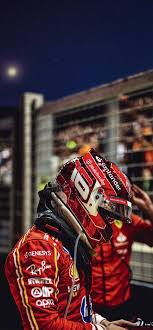

In [3]:
from Crypto.Cipher import DES
from Crypto.Util.Padding import pad, unpad
from IPython.display import display
import base64
import os
from PIL import Image
import numpy as np

def image_to_bits(image_path):
    with open(image_path, 'rb') as f:
        return f.read()

def bits_to_image(data, output_path):
    with open(output_path, 'wb') as f:
        f.write(data)

def encrypt_DES(data, key):
    cipher = DES.new(key, DES.MODE_ECB)
    padded_data = pad(data, DES.block_size)
    encrypted_data = cipher.encrypt(padded_data)
    return encrypted_data

def decrypt_DES(data, key):
    cipher = DES.new(key, DES.MODE_ECB)
    decrypted_data = cipher.decrypt(data)
    return unpad(decrypted_data, DES.block_size)

def main():
    image_path = 'Charl.jpg'
    key = b'1a5d9s7r'

    # Imagen a bits
    image_bits = image_to_bits(image_path)

    # Cifrar la imagen
    encrypted_bits = encrypt_DES(image_bits, key)

    # Codificar en Base64
    encoded_base64 = base64.b64encode(encrypted_bits)
    print(f'Texto en Base64:\n{encoded_base64.decode()}')

    # Decodificar de Base64
    decoded_bits = base64.b64decode(encoded_base64)
    # Descifrar utilizando DES
    decrypted_bits = decrypt_DES(decoded_bits, key)

    # Imagen descrifrada
    path_img_final = "imagen_final.png"
    bits_to_image(decrypted_bits, path_img_final)
    print(f"Imagen descifrada guardada como {path_img_final}")

    img = Image.open(path_img_final)
    display(img)

if __name__ == "__main__":
    main()